In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "AppleGothic"
import pandas as pd 

In [24]:
metro_final_df = pd.read_csv(
    "./../data/preproc/metro/metro_v1_final.csv", index_col=0
)

In [25]:
metro_final_df["날짜"] = pd.to_datetime(metro_final_df["날짜"])

In [26]:
n = 10
top_n_station = (
    metro_final_df.reset_index()
    .groupby(["역명"])["total_out"]
    .sum()
    .nlargest(10)
    .index
)

In [27]:
_metro_final_df = metro_final_df.loc[top_n_station, :]
_metro_final_df["year"] = _metro_final_df["날짜"].apply(lambda x: x.year)

In [28]:
pivot_df = (
    _metro_final_df.reset_index()
    .pivot(index="역명", values="total_out", columns="year")
    .fillna(0)
)
pivot_df = pivot_df.loc[top_n_station,:]

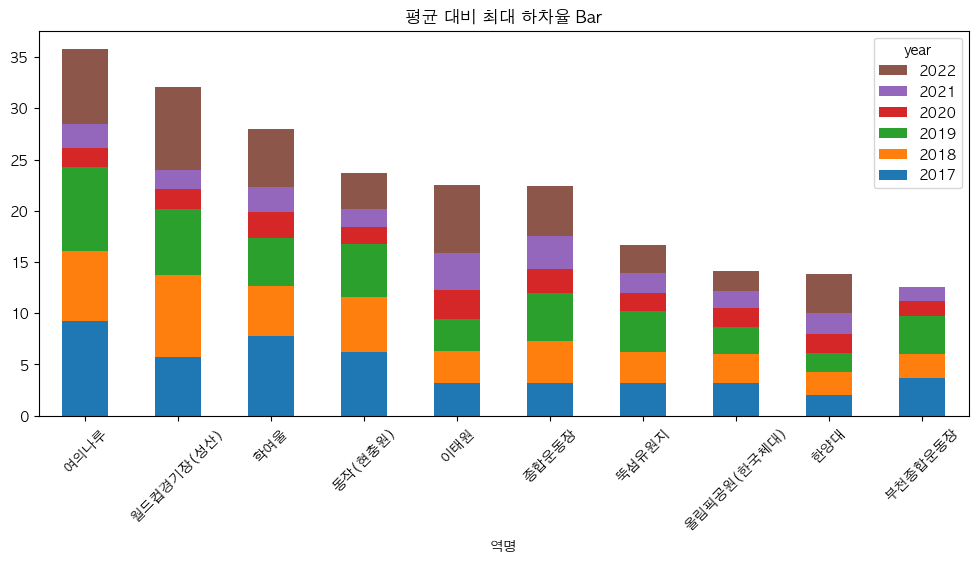

In [29]:
pivot_df.plot.bar(stacked=True, legend="reverse", figsize=(12, 5))

plt.xticks(rotation=45)
plt.title("평균 대비 최대 하차율 Bar")
plt.show()